In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import yaml
import os

from gammapy.datasets import MapDataset, Datasets, FluxPointsDataset
from gammapy.maps import Map
from gammapy.makers import FoVBackgroundMaker
from gammapy.catalog import SourceCatalogHGPS
from gammapy.modeling.models import Models, SkyModel, TemplateSpatialModel, PowerLawNormSpectralModel, PowerLawSpectralModel

In [5]:
def open_dataset(name, hessera):
    dataset= MapDataset.read(f'{name}.fits')
    dataset.mask_safe = Map.from_geom(geom=dataset.counts.geom, data=np.ones_like(dataset.counts.data).astype(bool))   
    dataset.mask_safe &= dataset.counts.geom.region_mask(f"galactic;circle(0, 0, 2)")
    
    dataset.mask_fit = Map.from_geom(geom=dataset.counts.geom, data=np.ones_like(dataset.counts.data).astype(bool))   
    dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(0, 0, 0.2)")

    dataset.counts = dataset.counts*dataset.mask_safe
    dataset.background = dataset.background*dataset.mask_safe
    
    model_path = f'fitted_model_min_{name}.yml'
    if os.path.exists(model_path):
        dataset.models = Models.read(model_path)
    return dataset

In [6]:
hesseras=['hess1', 'hess2', 'hess1u']
muoneff_flag= True
edisp = True

info_list = [] #hessera, muoneff, edisp, name

mainpath_hess = '/home/vault/caph/mppi062h/repositories/GC/HESS'

for hessera in hesseras:
    if hessera =='hess1u':
        muoneff_flag=False
        
    if hessera == 'hess1':
        name_afterFermi='v1'
        for name_afterFermi_idx in range(3):
            name = f'dataset_min_{hessera}_muoneff{muoneff_flag}_edisp{edisp}_afterFermi{name_afterFermi}_{name_afterFermi_idx}'
            info_list.append([hessera, muoneff_flag, edisp, name])
    else:
        name = f'dataset_min_{hessera}_muoneff{muoneff_flag}_edisp{edisp}'
        info_list.append([hessera, muoneff_flag, edisp, name])
    
datasets_hess = []
for i in range(len(info_list)):
    datasets_hess.append(open_dataset(info_list[i][3], info_list[i][0])) 

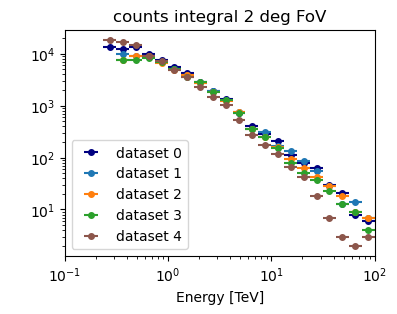

In [7]:
colors = ['navy', 'C0', 'C1', 'C2', 'C5']
central_source = 'HESS J1745-290'

fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)

for idx, dataset in enumerate(datasets_hess):
    dataset.counts.get_spectrum().plot(ax=ax, label=f'dataset {idx}', color=colors[idx])
ax.set_title('counts integral 2 deg FoV')
ax.legend()

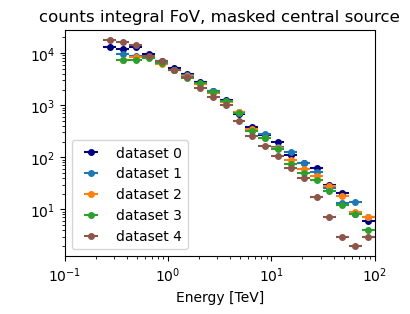

In [8]:
colors = ['navy', 'C0', 'C1', 'C2', 'C5']
central_source = 'HESS J1745-290'

fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)

for idx, dataset in enumerate(datasets_hess):
    (dataset.counts*dataset.mask_fit).get_spectrum().plot(ax=ax, label=f'dataset {idx}', color=colors[idx])
ax.set_title('counts integral FoV, masked central source')
ax.legend()

/tmp/ipykernel_26564/364847420.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/(dataset.counts*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/364847420.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/(dataset.counts*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/364847420.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/(dataset.counts*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/364847420.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/(dataset.counts*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/364847420.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/(dataset.counts*dataset.mask_fit).get_spectrum().data


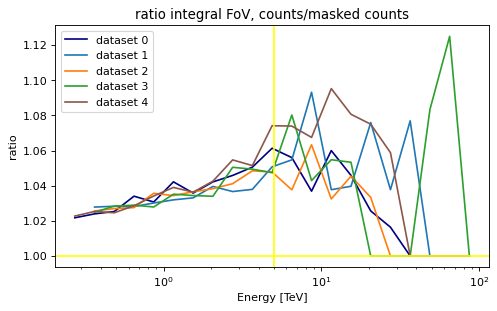

In [9]:
colors = ['navy', 'C0', 'C1', 'C2', 'C5']
central_source = 'HESS J1745-290'

fig, ax = plt.subplots(1,1, figsize=(7, 4), dpi=80)
x_axis= dataset.counts.geom.axes['energy'].center.value
for idx, dataset in enumerate(datasets_hess):
    
    ratio = dataset.counts.get_spectrum().data/(dataset.counts*dataset.mask_fit).get_spectrum().data
    ax.plot(x_axis, ratio[:, :, 0], label=f'dataset {idx}', color=colors[idx])
ax.set_title('ratio integral FoV, counts/masked counts')
ax.axvline(5, color='yellow')
ax.axhline(1, color='yellow')

ax.set_xscale('log')
ax.set_ylabel('ratio')
ax.set_xlabel('Energy [TeV]')
ax.legend()

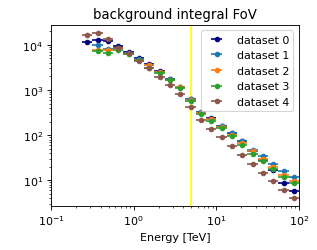

In [10]:
colors = ['navy', 'C0', 'C1', 'C2', 'C5']
central_source = 'HESS J1745-290'

fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=80)

for idx, dataset in enumerate(datasets_hess):
    dataset.background.get_spectrum().plot(ax=ax, label=f'dataset {idx}', color=colors[idx])
ax.set_title('background integral FoV')
ax.axvline(5, color='yellow')
ax.legend()

/tmp/ipykernel_26564/2004371311.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/dataset.background.get_spectrum().data
/tmp/ipykernel_26564/2004371311.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/dataset.background.get_spectrum().data
/tmp/ipykernel_26564/2004371311.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/dataset.background.get_spectrum().data
/tmp/ipykernel_26564/2004371311.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/dataset.background.get_spectrum().data
/tmp/ipykernel_26564/2004371311.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = dataset.counts.get_spectrum().data/dataset.background.get_spectrum().data


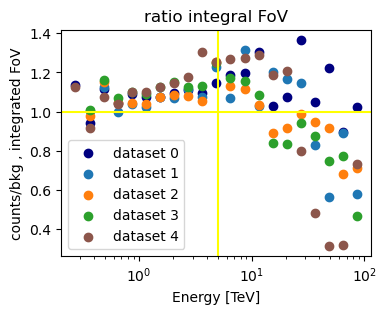

In [11]:
colors = ['navy', 'C0', 'C1', 'C2', 'C5']
central_source = 'HESS J1745-290'

fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)
x_axis= dataset.counts.geom.axes['energy'].center.value
for idx, dataset in enumerate(datasets_hess):
    
    ratio = dataset.counts.get_spectrum().data/dataset.background.get_spectrum().data
    ax.scatter(x_axis, ratio, label=f'dataset {idx}', color=colors[idx])
ax.set_title('ratio integral FoV')
ax.axvline(5, color='yellow')
ax.axhline(1, color='yellow')

ax.set_xscale('log')
ax.set_ylabel('counts/bkg , integrated FoV')
ax.set_xlabel('Energy [TeV]')
ax.legend()

/tmp/ipykernel_26564/3916292402.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = (dataset.counts*dataset.mask_fit).get_spectrum().data/(dataset.background*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/3916292402.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = (dataset.counts*dataset.mask_fit).get_spectrum().data/(dataset.background*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/3916292402.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = (dataset.counts*dataset.mask_fit).get_spectrum().data/(dataset.background*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/3916292402.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = (dataset.counts*dataset.mask_fit).get_spectrum().data/(dataset.background*dataset.mask_fit).get_spectrum().data
/tmp/ipykernel_26564/3916292402.py:8: RuntimeWarning: invalid value encountered in true_divide
  ratio = (dataset.counts*dataset.mas

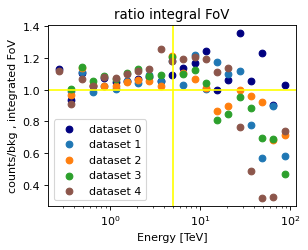

In [12]:
colors = ['navy', 'C0', 'C1', 'C2', 'C5']
central_source = 'HESS J1745-290'

fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=80)
x_axis= dataset.counts.geom.axes['energy'].center.value
for idx, dataset in enumerate(datasets_hess):
    
    ratio = (dataset.counts*dataset.mask_fit).get_spectrum().data/(dataset.background*dataset.mask_fit).get_spectrum().data
    ax.scatter(x_axis, ratio, label=f'dataset {idx}', color=colors[idx])
ax.set_title('ratio integral FoV')
ax.axvline(5, color='yellow')
ax.axhline(1, color='yellow')

ax.set_xscale('log')
ax.set_ylabel('counts/bkg , integrated FoV')
ax.set_xlabel('Energy [TeV]')
ax.legend()

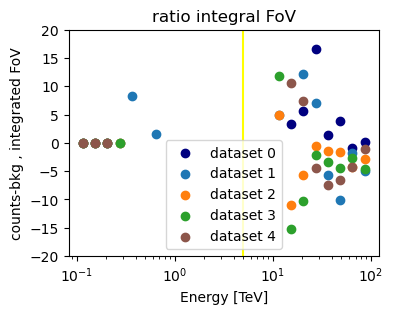

In [13]:

fig, ax = plt.subplots(1,1, figsize=(4, 3), dpi=100)
x_axis= dataset.counts.geom.axes['energy'].center.value
for idx, dataset in enumerate(datasets_hess):
    res = dataset.counts.get_spectrum().data-dataset.background.get_spectrum().data
    ax.scatter(x_axis, res, label=f'dataset {idx}', color=colors[idx])
ax.set_title('ratio integral FoV')
ax.axvline(5, color='yellow')
ax.set_xscale('log')
ax.set_ylabel('counts-bkg , integrated FoV')
ax.set_xlabel('Energy [TeV]')
ax.set_ylim(-20, 20)
ax.legend()